In [1]:
'''
 * @Author: 11921006 Peixin Zhang 
 * @Date: 2019-05-27
'''

'\n * @Author: 11921006 Peixin Zhang \n * @Date: 2019-05-27\n'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
txt = []
with open('optdigits-orig.tra', 'r') as fr:
        for line in fr.readlines():
            for ch in line.strip():
                if str(ch).isdigit():
                    txt.append(int(ch))

In [4]:
print('txt length:%d' % len(txt))

txt length:1982350


In [5]:
digits = np.reshape(txt, (-1, 1025))

In [6]:
print('digits.shape: %s' %(digits.shape,))

digits.shape: (1934, 1025)


In [7]:
filt = np.array([row[-1] == 3 for row in digits])

In [8]:
three = digits[filt]

In [9]:
trunc_three = np.delete(three, -1, 1)

In [10]:
print('trunc_three.shape: %s' %(trunc_three.shape,))

trunc_three.shape: (199, 1024)


In [11]:
mean = np.mean(trunc_three, axis=0)

In [12]:
print('mean.shape: %s' %(mean.shape,))

mean.shape: (1024,)


In [13]:
norm_three = np.subtract(trunc_three, mean)

In [14]:
print('norm_three.shape: %s' %(norm_three.shape,))

norm_three.shape: (199, 1024)


In [15]:
covariance = np.matmul(norm_three.transpose(), norm_three)

In [16]:
print('covariance.shape: %s' %(covariance.shape,))

covariance.shape: (1024, 1024)


In [17]:
u, d, vh = np.linalg.svd(covariance, full_matrices=True)

In [18]:
print("u.shape: %s" %(u.shape,))

u.shape: (1024, 1024)


In [19]:
u2 = u[: , : 2]

In [20]:
trans_three = np.matmul(norm_three, u2)

In [21]:
print('trans_three.shape: %s' %(trans_three.shape,))

trans_three.shape: (199, 2)


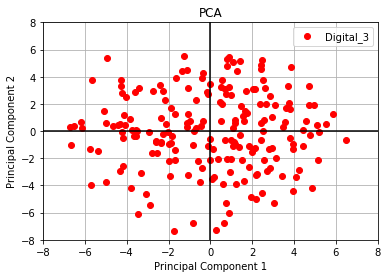

In [22]:
X1 = [-9,9]
Y1 = [0,0]
X2 = [0,0]
Y2 = [-9,9]
plt.plot(trans_three[:, 0],trans_three[:, 1],'ro',label = 'Digital_3')
plt.plot(X1,Y1,'k-')
plt.plot(X2,Y2,'k-')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid()
plt.legend()
plt.savefig('PCA_digital_3.png')
plt.show()

In [23]:
fig, axs = plt.subplots(1, 3)
plt.yticks([])
axs[0].imshow(np.reshape(trunc_three[0, :], (32, 32)), cmap='gray')
axs[1].imshow(np.reshape(u2[:, 0], (32, 32)), cmap='gray')
axs[2].imshow(np.reshape(u2[:, 1], (32, 32)), cmap='gray')
axs[0].set_xlabel('Origin Image', fontsize=10)     
axs[1].set_xlabel('Principal Component 1', fontsize=10)
axs[2].set_xlabel('Principal Component 2', fontsize=10)
fig.savefig('eigenvector.png')

In [24]:
fig, axs = plt.subplots(5, 5)
plt.yticks([])
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(np.reshape(trunc_three[i * 5 + j, :], (32, 32)), cmap='gray')
fig.savefig('first25.png')